In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
irdata = pd.read_csv('iris_data.txt', sep=",", header=None)
irdata.columns = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm", "class"]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = irdata[['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']]
y = irdata['class']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier(n_neighbors=1)

In [71]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [72]:
predictions = knn.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix,classification_report

In [74]:
print(confusion_matrix(y_test,predictions))

[[15  0  0]
 [ 0 20  2]
 [ 0  0 13]]


In [75]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        22
 Iris-virginica       0.87      1.00      0.93        13

    avg / total       0.97      0.96      0.96        50



In [76]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

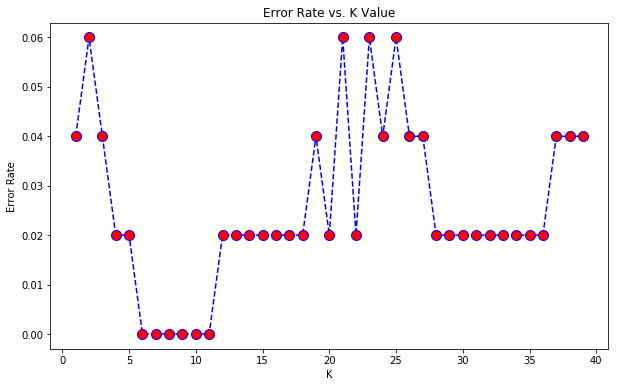

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [78]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[15  0  0]
 [ 0 21  1]
 [ 0  0 13]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.95      0.98        22
 Iris-virginica       0.93      1.00      0.96        13

    avg / total       0.98      0.98      0.98        50

